In [46]:
!apt install fonts-nanum
!apt install g++ openjdk-8-jdk python3-dev
!pip3 install konlpy
!pip3 install wordcloud
!pip3 install ujson

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
python3-dev is already the newest version (3.6.7-1~18.04).
openjdk-8-jdk is already the newest version (8u292-b10-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [47]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

plt.rcParams['axes.unicode_minus'] = False
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [48]:
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/한철EL/'

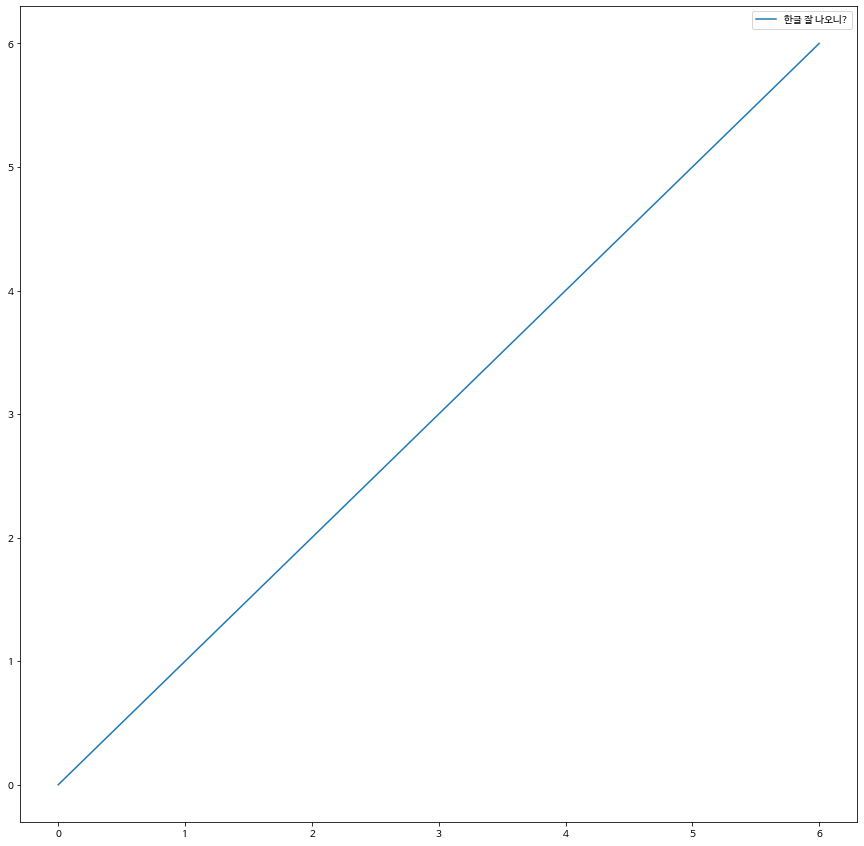

In [49]:
# matplotlib 차트 한글 표시 실험

plt.figure(figsize=(15, 15))
plt.plot([0, 6], [0, 6], label='한글 잘 나오니?')
plt.legend()
plt.show()

In [50]:
# import csv

# table = dict()

# #서울대 언어학과 감정사전 KOSAC 활용
# with open(DATA_DIR + 'polarity.csv', 'r', -1, 'utf-8') as polarity :
#   next(polarity)

#   for line in csv.reader(polarity) :
#     key = str()
#     for word in line[0].split(';'):
#       key += word.split('/')[0]

#     table[key] = {'Neg':line[3], 'Neut' : line[4],'Pos' : line[6]}

# columns=['Negative','Neutral','Positive']
# df = pd.DataFrame(columns=columns)
# df

In [51]:
# import re

# def text_processing(start, end) :
#   file_stop_word = open(DATA_DIR+'불용어.txt','r',-1,'utf-8')
#   stop_words=file_stop_word.read()
#   stop_word_list=[]
#   negative_list=[]
#   neutral_list=[]
#   positive_list=[]
#   for word in stop_words.split(' '):
#     if word not in stop_word_list:
#       stop_word_list.append(word)
#   file_stop_word.close()

#   for i in range(start, end) :
#     f = open(DATA_DIR + 'merge.csv', 'r', -1, 'utf-8')
#     f_words = csv_file_name['title']
  
#     f_words_list=[]

#     for j in f_words :
#       hanguel = re.compile('[^ ㄱ-ㅣ가-힇]+')
#       j = hanguel.sub('',j)
#       for i in j :
#         if i not in stop_word_list :
#           f_words_list.append(i)
#     f.close()

#     negative=0
#     neutral = 0
#     positive=0
#     for word in f_words_list:
#       if word in table :
#         negative += float(table[word]['Neg'])
#         neutral += float(table[word]['Neut'])
#         positive += float(table[word]['Pos'])

#     negative_list.append(negative)
#     neutral_list.append(neutral)
#     positive_list.append(positive)

#   df['Negative']=negative_list
#   df['Neutral'] = neutral_list
#   df['Positive'] = positive_list

# text_processing(0, 10)

# df

# 데이터 전처리

In [52]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [53]:
df = pd.read_csv(DATA_DIR + 'merge.csv')
df.drop(['time'], axis=1, inplace=True)
# df.drop(['press'], axis=1, inplace=True)
df.drop(['url'], axis=1, inplace=True)

df

,title,press
0,"日정부, 韓 법원 '한국내 재산 공개' 명령에 불응 시사",아시아경제
1,'유통망+e커머스 노하우' 시너지 기대..'승자의 저주' 우려도,파이낸셜뉴스
2,노동자 추락사에 또 '집행유예'..멀고 먼 책임자 처벌,MBC
3,"與, 경선일정 현행유지 무게..'흥행' 경선룰 요구 분출",연합뉴스
4,"日정부, 韓 법원 '한국내 재산 공개' 명령에 불응 시사",아시아경제
...,...,...
423,"검찰, 이규원 검사 첫 소환..'과거사 조사단 의혹' 수사",뉴시스
424,"스가 ""문 대통령이 인사하러 와서, 실례 안 되게 인사한 것""",한겨레
425,"""중견기업 ESG 경영, 제도적 인센티브 뒷받침 돼야""",전자신문
426,경찰 출신 변호사 '사적접촉 금지' 기간 5년으로 확대,한겨레


In [54]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

apply_regular_expression(df['title'][1])

'유통망커머스 노하우 시너지 기대승자의 저주 우려도'

In [55]:
from konlpy.tag import Okt #명사 형태소 추출함수
from collections import Counter

okt = Okt()
nouns = okt.nouns(apply_regular_expression(df['title'][1]))
nouns

['유통', '망', '커머스', '노하우', '시너지', '기대승', '저주', '우려']

In [56]:
#말뭉치(corpus)에 적용해서 명사 형태소 추출
corpus=''.join(df['title'].tolist())
corpus

'日정부, 韓 법원 \'한국내 재산 공개\' 명령에 불응 시사\'유통망+e커머스 노하우\' 시너지 기대..\'승자의 저주\' 우려도노동자 추락사에 또 \'집행유예\'..멀고 먼 책임자 처벌與, 경선일정 현행유지 무게..\'흥행\' 경선룰 요구 분출日정부, 韓 법원 \'한국내 재산 공개\' 명령에 불응 시사\'유통망+e커머스 노하우\' 시너지 기대..\'승자의 저주\' 우려도현대산업개발 본사 압수수색..경찰 "하도급 불법 확인"이준석, \'사무총장 내정\' 한기호에 "군인 출신 가장 공명정대할 것"日정부, 韓 법원 \'한국내 재산 공개\' 명령에 불응 시사\'유통망+e커머스 노하우\' 시너지 기대..\'승자의 저주\' 우려도\'마포 오피스텔 사망 20대\' 가족, 지난해 용의자 친구 2명 고소했다윤석열 측 "탈진보 품고 압도적 정권 교체" 反文 빅텐트 꺼냈다日정부, 韓 법원 \'한국내 재산 공개\' 명령에 불응 시사병사들 앞에서 女중대장에 "돼지 같은 X" 모욕한 소대장 보직해임원세훈 "사람 죽인 것도 아닌데 너무 잔인"..선처 호소\'유통망+e커머스 노하우\' 시너지 기대..\'승자의 저주\' 우려도日정부, 韓 법원 \'한국내 재산 공개\' 명령에 불응 시사신세계·네이버, 이베이 인수에 \'성큼\'.. e커머스 업계 지각변동 예고류호정, 등에 타투 새기고 보라색 드레스로.."타투 자유 보호하라"\'김용익의 단식\' 통했나.. 건보공단 고객센터 파업 푼다日정부, 韓 법원 \'한국내 재산 공개\' 명령에 불응 시사코스피 사흘째 최고가 랠리..장중 최고치도 5개월만에 경신윤석열 출마 가시화..가족·측근 檢수사 향배도 관심文 "스페인과 전기·수소차 협력..전략적 동반자로 격상"日정부, 韓 법원 \'한국내 재산 공개\' 명령에 불응 시사코스피 사흘째 최고가 랠리..장중 최고치도 5개월만에 경신인권위 "\'구치소 코로나 집단감염\' 대응 미흡 확인"이준석 "갑자기 웬 당명교체"..安 "입장 바꿔 생각해야지"日정부, 韓 법원 \'한국내 재산 공개\' 명령에 불응 시사코스피

In [57]:
#말뭉치에 정규 표현식 적용
apply_regular_expression(corpus)

'정부  법원 한국내 재산 공개 명령에 불응 시사유통망커머스 노하우 시너지 기대승자의 저주 우려도노동자 추락사에 또 집행유예멀고 먼 책임자 처벌 경선일정 현행유지 무게흥행 경선룰 요구 분출정부  법원 한국내 재산 공개 명령에 불응 시사유통망커머스 노하우 시너지 기대승자의 저주 우려도현대산업개발 본사 압수수색경찰 하도급 불법 확인이준석 사무총장 내정 한기호에 군인 출신 가장 공명정대할 것정부  법원 한국내 재산 공개 명령에 불응 시사유통망커머스 노하우 시너지 기대승자의 저주 우려도마포 오피스텔 사망 대 가족 지난해 용의자 친구 명 고소했다윤석열 측 탈진보 품고 압도적 정권 교체  빅텐트 꺼냈다정부  법원 한국내 재산 공개 명령에 불응 시사병사들 앞에서 중대장에 돼지 같은  모욕한 소대장 보직해임원세훈 사람 죽인 것도 아닌데 너무 잔인선처 호소유통망커머스 노하우 시너지 기대승자의 저주 우려도정부  법원 한국내 재산 공개 명령에 불응 시사신세계네이버 이베이 인수에 성큼 커머스 업계 지각변동 예고류호정 등에 타투 새기고 보라색 드레스로타투 자유 보호하라김용익의 단식 통했나 건보공단 고객센터 파업 푼다정부  법원 한국내 재산 공개 명령에 불응 시사코스피 사흘째 최고가 랠리장중 최고치도 개월만에 경신윤석열 출마 가시화가족측근 수사 향배도 관심 스페인과 전기수소차 협력전략적 동반자로 격상정부  법원 한국내 재산 공개 명령에 불응 시사코스피 사흘째 최고가 랠리장중 최고치도 개월만에 경신인권위 구치소 코로나 집단감염 대응 미흡 확인이준석 갑자기 웬 당명교체 입장 바꿔 생각해야지정부  법원 한국내 재산 공개 명령에 불응 시사코스피 사흘째 최고가 랠리장중 최고치도 개월만에 경신수리 맡겼더니고객 에 랜섬웨어 심어 수억 원 챙긴 수리기사 검거송영길 년 집권론 국민눈에 오만하게 비쳐질까 걱정정부  법원 한국내 재산 공개 명령에 불응 시사서울중앙지검  가족 사건 김오수총장 보고 없이 단독 지휘코스피 사흘째 최고가 랠리장중 최고치도 개월만에 경신정무수석 만난 이준석 야당을 협치 파트너로 

In [58]:
#전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['정부', '법원', '국내', '재산', '공개', '명령', '불응', '유통', '망', '커머스', '노하우', '시너지', '기대승', '저주', '우려', '노동자', '추락', '사', '또', '집행유예', '책임자', '처벌', '경선', '일정', '현행', '유지', '무게', '흥행', '경선', '룰', '요구', '분출', '정부', '법원', '국내', '재산', '공개', '명령', '불응', '유통', '망', '커머스', '노하우', '시너지', '기대승', '저주', '우려', '산업', '개발', '본사', '압수수색', '경찰', '하도급', '불법', '확인', '이준석', '사무', '총장', '내정', '한기호', '군인', '출신', '가장', '공명정대', '것', '정부', '법원', '국내', '재산', '공개', '명령', '불응', '유통', '망', '커머스', '노하우', '시너지', '기대승', '저주', '우려', '마포', '오피스텔', '사망', '가족', '지난해', '용의자', '친구', '명', '윤석열', '탈', '진보', '압도', '정권', '교체', '빅', '텐트', '정부', '법원', '국내', '재산', '공개', '명령', '불응', '병사', '앞', '중대장', '돼지', '모욕', '소대장', '보직', '해임', '원세훈', '사람', '것', '잔인', '선처', '호소', '유통', '망', '커머스', '노하우', '시너지', '기대승', '저주', '우려', '정부', '법원', '국내', '재산', '공개', '명령', '불응', '시사', '신세계', '네이버', '이베이', '인수', '성큼', '커머스', '업계', '지각', '변동', '예고', '류', '호정', '등', '타투', '보라색', '드레스', '타투', '자유', '보호', '김용익', '단식', '통', '건보', '공단', '고객', '센터', '파업', '정부', '법원', '

In [59]:
#빈도 탐색
counter = Counter(nouns)
counter.most_common(10) #상위 n개 출력

[('중국', 39),
 ('나토', 35),
 ('못', 26),
 ('도전', 26),
 ('명', 23),
 ('대통령', 23),
 ('최저임금', 23),
 ('바이든', 22),
 ('접종', 21),
 ('시간', 21)]

In [60]:
#한글자 명사 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('중국', 39),
 ('나토', 35),
 ('도전', 26),
 ('대통령', 23),
 ('최저임금', 23),
 ('바이든', 22),
 ('접종', 21),
 ('시간', 21),
 ('푸틴', 21),
 ('이준석', 20)]

In [61]:
#불용어 사전 추가
#RANKS NL에서 제공해주는 한국어 불용어 사전

stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]


# #내가 직접 불용어 사전 추가하기
# press_title_stopwords = ['단어1', '단어1', '단어3', '단어4', '단어5', '단어6']
# for word in press_title_stopwords:
#     stopwords.append(word)



[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [62]:
#Bags of Words 벡터 생성 (BoW 벡터)

from sklearn.feature_extraction.text import CountVectorizer

#위에서 실험한 내용들을 가져와서 객체화
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['title'].tolist()) 
word_list = vect.get_feature_names() #등장한 단어 리스트
count_list = bow_vect.toarray().sum(axis=0) #각 단어가 전체 title 중에 등장한 총 횟수 (array값으로 저장됨)

print(bow_vect.toarray()) #각 단어의 title별 등장 횟수 (2차원 array값으로 저장됨.)
bow_vect.shape
#행은 title 열은 단어 | 단어가 포함되면 값이 들어감.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(428, 972)

In [63]:
# 단어와 등장횟수를 딕셔너리에 zip

word_count_dict = dict(zip(word_list, count_list))
word_count_dict


{'가능': 7,
 '가동': 2,
 '가시': 1,
 '가장': 1,
 '가족': 4,
 '가톨릭': 8,
 '가혹': 4,
 '갈등': 6,
 '감금': 10,
 '감리': 3,
 '감사원': 1,
 '감소': 8,
 '감염': 1,
 '감염병': 1,
 '감축': 3,
 '갑자기': 1,
 '강조': 1,
 '강화': 1,
 '개념': 1,
 '개막': 2,
 '개발': 1,
 '개월': 6,
 '개입': 5,
 '개편': 2,
 '개혁': 2,
 '거래소': 1,
 '거리': 3,
 '거부': 1,
 '거사': 2,
 '거울': 3,
 '거점': 1,
 '걱정': 1,
 '건물': 1,
 '건보': 6,
 '걸음': 1,
 '검거': 1,
 '검공': 1,
 '검사': 1,
 '검증': 1,
 '검찰': 13,
 '격리': 1,
 '격상': 2,
 '격화': 5,
 '견제': 2,
 '결정': 13,
 '경고': 1,
 '경기': 5,
 '경비원': 1,
 '경선': 2,
 '경신': 4,
 '경연': 8,
 '경영': 1,
 '경쟁': 4,
 '경전': 5,
 '경제': 5,
 '경찰': 6,
 '경찰청장': 1,
 '계속': 1,
 '고객': 2,
 '고려': 1,
 '고령': 1,
 '고발': 1,
 '고용': 7,
 '고작': 10,
 '골리앗': 4,
 '곰팡이': 1,
 '곳곳': 6,
 '공개': 10,
 '공급': 1,
 '공단': 1,
 '공동': 1,
 '공명정대': 1,
 '공모': 2,
 '공사': 3,
 '공세': 1,
 '공식': 1,
 '공유': 2,
 '공인': 1,
 '공포정치': 1,
 '과시': 1,
 '과장': 10,
 '과학': 1,
 '관건': 1,
 '관계': 7,
 '관련': 1,
 '관리': 1,
 '관심': 2,
 '관중': 1,
 '관행': 1,
 '광주': 4,
 '괴담': 1,
 '교사': 1,
 '교체': 4,
 '교통사고': 1,
 '교황': 10,
 '구도': 1,
 '구속': 4,
 '구속영장'

In [64]:
#BoW벡터를 TF-IDF변환

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

print(tf_idf_vect.shape) #bow vect shape와 동일
#여기서 행은 title, 열은 단어를 의미

(428, 972)


In [65]:
# 첫 번째 title에서 단어 중요도 (TF-IDF값) : 0이 아닌 것만 출력
print(tf_idf_vect[0]) 

  (0, 710)	0.34520813606523815
  (0, 682)	0.3580332961256492
  (0, 479)	0.3580332961256492
  (0, 376)	0.3580332961256492
  (0, 339)	0.33422192625078195
  (0, 270)	0.3580332961256492
  (0, 100)	0.3580332961256492
  (0, 67)	0.3580332961256492


In [66]:
# 첫 번째 title에서 단어 중요도 (TF-IDF값) : 0이 값까지 포함해서 출력
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 972)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.3580333  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [67]:
#벡터와 단어 mapping
vect.vocabulary_

{'가능': 0,
 '가동': 1,
 '가시': 2,
 '가장': 3,
 '가족': 4,
 '가톨릭': 5,
 '가혹': 6,
 '갈등': 7,
 '감금': 8,
 '감리': 9,
 '감사원': 10,
 '감소': 11,
 '감염': 12,
 '감염병': 13,
 '감축': 14,
 '갑자기': 15,
 '강조': 16,
 '강화': 17,
 '개념': 18,
 '개막': 19,
 '개발': 20,
 '개월': 21,
 '개입': 22,
 '개편': 23,
 '개혁': 24,
 '거래소': 25,
 '거리': 26,
 '거부': 27,
 '거사': 28,
 '거울': 29,
 '거점': 30,
 '걱정': 31,
 '건물': 32,
 '건보': 33,
 '걸음': 34,
 '검거': 35,
 '검공': 36,
 '검사': 37,
 '검증': 38,
 '검찰': 39,
 '격리': 40,
 '격상': 41,
 '격화': 42,
 '견제': 43,
 '결정': 44,
 '경고': 45,
 '경기': 46,
 '경비원': 47,
 '경선': 48,
 '경신': 49,
 '경연': 50,
 '경영': 51,
 '경쟁': 52,
 '경전': 53,
 '경제': 54,
 '경찰': 55,
 '경찰청장': 56,
 '계속': 57,
 '고객': 58,
 '고려': 59,
 '고령': 60,
 '고발': 61,
 '고용': 62,
 '고작': 63,
 '골리앗': 64,
 '곰팡이': 65,
 '곳곳': 66,
 '공개': 67,
 '공급': 68,
 '공단': 69,
 '공동': 70,
 '공명정대': 71,
 '공모': 72,
 '공사': 73,
 '공세': 74,
 '공식': 75,
 '공유': 76,
 '공인': 77,
 '공포정치': 78,
 '과시': 79,
 '과장': 80,
 '과학': 81,
 '관건': 82,
 '관계': 83,
 '관련': 84,
 '관리': 85,
 '관심': 86,
 '관중': 87,
 '관행': 88,
 '광주': 89,
 '괴담':

In [68]:
#순서 반대로 [단어 : 벡터] -> [벡터 : 단어]
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{710: '정부', 339: '법원', 100: '국내', 682: '재산', 67: '공개', 270: '명령', 376: '불응', 479: '시사', 610: '유통', 8...


# **감성 분류 - Logistic Regression**

In [69]:
df.sample(10)

,title,press
48,"노동부 ""5~49인 기업, 예정대로 7월 주52시간제 적용""",노컷뉴스
268,"한경연 ""최저임금 1만원 되면 일자리 30만개 감소""",뉴시스
414,'빅 블러'는 자동차 산업을 어떻게 바꿀까,경향신문
312,"""한·일 정상회담 日이 일방취소""..15일부터 독도방어훈련",이데일리
323,"오스트리아 총리 코로나 질문에 文 ""감염병 대응, 국제 매뉴얼 마련해야""",뉴스1
30,수리 맡겼더니..고객 PC에 랜섬웨어 심어 수억 원 챙긴 수리기사 검거,이데일리
121,"동거 친구들 감금·학대로 숨진 20대男..""몸무게 고작 34kg""",이데일리
261,"휴일 영향 이틀째 3백 명대..""이르면 오늘 1차 접종 1,300만 달성""",YTN
202,"금통위원 상당수가 ""통화정책·기준금리 점진적 정상화 필요""",아시아경제
55,"선거법 위반 이상직 의원, 징역 1년4개월·집유 2년..당선무효형",한겨레


In [70]:
#데이터셋 생성
def press_to_label(press) :
  #2:진보 | 1:중도(+ 지상파 3사) | 0:보수
  #뉴스1 : 머니투데이 소속
  if press == '경향신문' or press =='한겨레' or press =='프레시안' or press =='오마이뉴스' or press =='뉴스1' or press =='머니투데이' or press =='이데일리' or press =='미디어오늘' or press =='YTN' or press == 'MBC' or press =='뉴시스' or press =='서울신문' or press =='지디넷코리아' or press =='내일신문':
    return 1
  # elif  or press == 'KBS' or press == 'SBS' or press == '뉴시스'  or press =='한국일보' or press =='내일신문' or press == "파이낸셜뉴스"  :
  #   return 1
  else : 
    return 0

df['y'] = df['press'].apply(lambda x: press_to_label(x))

print(df['y'].value_counts())

0    227
1    201
Name: y, dtype: int64


In [71]:
#Training set/ Test set 나누기

from sklearn.model_selection import train_test_split

x = tf_idf_vect #title 벡터값
y = df['y'] #진영 값
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((299, 972), (299,), (129, 972), (129,))

In [72]:
#Logistic Regression 모델 학습

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

# classification result for test set
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred, average='weighted')) #정밀도
print('recall: %.2f' % recall_score(y_test, y_pred)) #재현율
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.78
precision: 0.80
recall: 0.86
F1: 0.78


Accuracy (정확도) : 전체 분류 중에 얼마나 제대로 분류했어?

Precision (정밀도) : 모델이 True로 분류한 것 중에, 실제로 True인건 얼마야?

Recall (재현율) : 실제로 True인 것 중에, 모델이 True로 분류한 건 얼마야?

F1-score : 재현율과 정밀도의 조화평균은?   


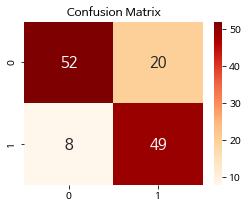

In [73]:
# confusion matrix (오차행렬) : 머신러닝 중 분류(Classification) 모델의 정확도를 2X2 행렬로 표시하는 방법이다.

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()



샘플데이터의 클래스 불균형으로 인하여 예측 정확도가 매우 낮아짐. 클래스 불균형 조징필요 > 샘플링 재조정

균형을 이를 경우에는 사용할 필요가 없음.

In [74]:
# print(df['y'].value_counts())

# positive_random_idx = df[df['y']==1].sample(18, random_state=12).index.tolist()
# negative_random_idx = df[df['y']==0].sample(18, random_state=12).index.tolist()

# random_idx = positive_random_idx + negative_random_idx
# x = tf_idf_vect[random_idx]
# y = df['y'][random_idx]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


# x_train.shape, y_train.shape, x_test.shape, y_test.shape


In [75]:
# #모델 재학습

# lr2 = LogisticRegression(random_state = 0)
# lr2.fit(x_train, y_train)
# y_pred = lr2.predict(x_test)

# # classification result for test set

# print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
# print('precision: %.2f' % precision_score(y_test, y_pred))
# print('recall: %.2f' % recall_score(y_test, y_pred))
# print('F1: %.2f' % f1_score(y_test, y_pred))


In [76]:
# # confusion matrix

# from sklearn.metrics import confusion_matrix

# confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

# plt.figure(figsize=(4, 3))
# sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
# plt.title('Confusion Matrix')
# plt.show()

# 중도 Or 진보 VS 보수 키워드 분석

<BarContainer object of 972 artists>

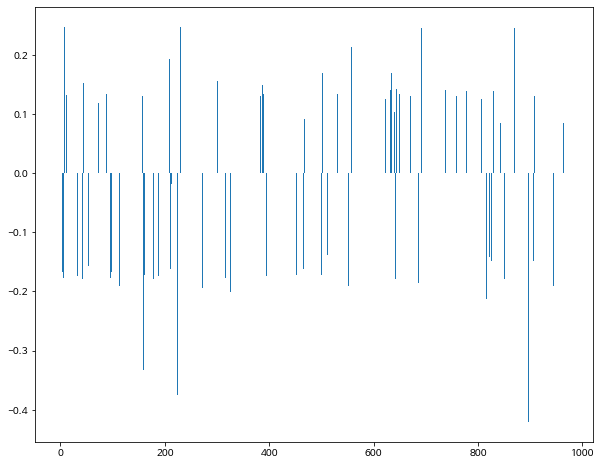

In [77]:
#Logistic Regression 모델에 각 단어의 coeficient를 시각화
# lr2.coef_
lr.coef_
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

#양이 진보, 음이 보수

In [78]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse = False)
coef_pos_index


[(0.7770429699955712, 50),
 (0.7770429699955712, 11),
 (0.7502568903573246, 822),
 (0.7455106913971337, 742),
 (0.739484372348593, 213),
 (0.6895030151322445, 843),
 (0.6826568160571364, 905),
 (0.6826568160571364, 230),
 (0.6826568160571364, 63),
 (0.6826568160571364, 8),
 (0.6794359301545339, 532),
 (0.6369796254126678, 873),
 (0.6369796254126678, 503),
 (0.6352542968782117, 327),
 (0.6264814181490789, 44),
 (0.6140106892845971, 226),
 (0.6074312996182837, 323),
 (0.6074312996182837, 118),
 (0.6074312996182837, 94),
 (0.5693183597004583, 485),
 (0.5639112968004251, 959),
 (0.5318605736582406, 468),
 (0.5162943814583664, 565),
 (0.5130505202598834, 620),
 (0.5130505202598834, 615),
 (0.5130505202598834, 129),
 (0.5130505202598834, 5),
 (0.49622546888879626, 697),
 (0.4738533879481444, 176),
 (0.46328148089639715, 378),
 (0.4623260231694371, 640),
 (0.444713079157143, 605),
 (0.444713079157143, 513),
 (0.444713079157143, 382),
 (0.444713079157143, 52),
 (0.4189436611797811, 179),
 (0.4

In [79]:
#전처리 과정에서
# invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
# invert_index_vectorizer

news_dict1 = {}
idx1=0
news_dict2 = {}
idx2=0

print('진보')
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

print('----------구분선----------')
print('보수')
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])



진보
경연 0.7770429699955712
감소 0.7770429699955712
최대 0.7502568903573246
주식 0.7455106913971337
대통령 0.739484372348593
친구 0.6895030151322445
학대 0.6826568160571364
동거 0.6826568160571364
고작 0.6826568160571364
감금 0.6826568160571364
언택트 0.6794359301545339
투자자 0.6369796254126678
쌍용차 0.6369796254126678
방일 0.6352542968782117
결정 0.6264814181490789
도쿄올림픽 0.6140106892845971
방북 0.6074312996182837
그날 0.6074312996182837
교황 0.6074312996182837
식사 0.5693183597004583
----------구분선----------
보수
중국 -1.2442392009235972
나토 -1.0711314038214024
안보 -0.7495316290621128
필요 -0.7121243019798041
정상화 -0.6625044550154463
도전 -0.6517755563837383
사건 -0.6486112641396347
정부 -0.6262992745171704
해킹 -0.6235848080389303
백신 -0.6029564338345854
노동부 -0.5819609475989751
시간제 -0.5819609475989751
내년 -0.577997722117064
속도 -0.577997722117064
시급 -0.577997722117064
심의 -0.577997722117064
올핸 -0.577997722117064
정해 -0.577997722117064
표기 -0.577997722117064
보고 -0.574352018328824


In [80]:

news_dict1 = {}
idx1=0
news_dict2 = {}
idx2=0

print('진보 키워드 csv 저장')
for coef in coef_pos_index[:20]:
    news_dict1[idx1] ={
    'keyword':invert_index_vectorizer[coef[1]], 
    'coef':coef[0]
    }
    idx1 += 1



print('보수 키워드 csv 저장')
for coef in coef_neg_index[:20]:
    news_dict2[idx2] ={
    'keyword':invert_index_vectorizer[coef[1]], 
    'coef':coef[0]
    }
    idx2 += 1


news_df1 = pd.DataFrame(news_dict1).T
news_df2 = pd.DataFrame(news_dict2).T

csv_file_name1 = DATA_DIR + '진보_뉴스_키워드.csv'
csv_file_name2 = DATA_DIR + '보수_뉴스_키워드.csv'

news_df1.to_csv(csv_file_name1,index=False, encoding="utf-8-sig")
news_df2.to_csv(csv_file_name2,index=False, encoding="utf-8-sig")


진보 키워드 csv 저장
보수 키워드 csv 저장


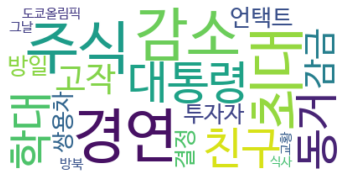

In [81]:
#워드클라우드 - 진보 진영 계수에 따른 크기
from wordcloud import WordCloud

coef_list1 = pd.read_csv(DATA_DIR+'진보_뉴스_키워드.csv')

font_file_name = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
cloud_gen = WordCloud(font_path=font_file_name, max_words=200, collocations=False, background_color='white')

#pandas에서 press를 인덱스로 하고, to_dict()[]에 적히는 열의 값을 value로 함.
frequencies = coef_list1.set_index('keyword').to_dict()['coef']

#generate_from_frequencies : 빈도수에 따른 워드 클라우드 생성
cloud_gen = cloud_gen.generate_from_frequencies(frequencies)

plt.figure()
plt.imshow(cloud_gen, interpolation="bilinear")
plt.axis("off")
plt.show()  


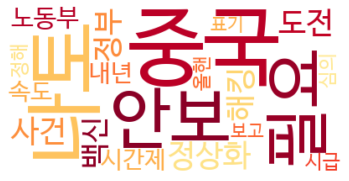

{'나토': 1.0711314038214024,
 '내년': 0.577997722117064,
 '노동부': 0.5819609475989751,
 '도전': 0.6517755563837383,
 '백신': 0.6029564338345854,
 '보고': 0.574352018328824,
 '사건': 0.6486112641396347,
 '속도': 0.577997722117064,
 '시간제': 0.5819609475989751,
 '시급': 0.577997722117064,
 '심의': 0.577997722117064,
 '안보': 0.7495316290621128,
 '올핸': 0.577997722117064,
 '정부': 0.6262992745171704,
 '정상화': 0.6625044550154463,
 '정해': 0.577997722117064,
 '중국': 1.2442392009235972,
 '표기': 0.577997722117064,
 '필요': 0.7121243019798041,
 '해킹': 0.6235848080389303}

In [82]:
#워드클라우드 - 보수 진영 계수에 따른 크기
from wordcloud import WordCloud

coef_list2 = pd.read_csv(DATA_DIR+'보수_뉴스_키워드.csv')

font_file_name = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
cloud_gen = WordCloud(font_path=font_file_name, max_words=200, collocations=False, background_color='white', colormap='YlOrRd')

#보수 계수는 음수이므로 일괄 -1을 곱하여 양수로 변환
coef_list2['coef'] = coef_list2['coef']*-1

#pandas에서 press를 인덱스로 하고, to_dict()[]에 적히는 열의 값을 value로 함.
frequencies = coef_list2.set_index('keyword').to_dict()['coef']


#generate_from_frequencies : 빈도수에 따른 워드 클라우드 생성
cloud_gen = cloud_gen.generate_from_frequencies(frequencies)

plt.figure()
plt.imshow(cloud_gen, interpolation="bilinear")
plt.axis("off")
plt.show()  

frequencies


In [83]:
! pip install squarify 

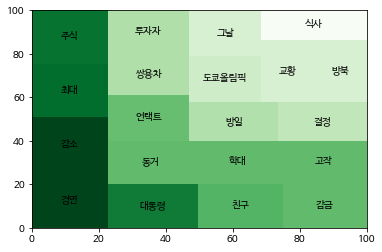

In [84]:
import squarify
import seaborn as sns
import matplotlib

df = pd.read_csv(DATA_DIR+'진보_뉴스_키워드.csv')


df_pivot = df.pivot_table(index='keyword', values = 'coef', aggfunc = 'sum') # 피벗테이블 만들기
df_pivot = df_pivot.sort_values(by='coef', ascending = False)  # 값 정렬하기

cmap = matplotlib.cm.Greens   # 값이 클 수록 진한 빨간색을 가지는 컬러맵
minimum=df_pivot['coef'].min()
maximum=df_pivot['coef'].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)   # 최소값, 최대값으로 정규화 하기
color_list = [cmap(norm(value)) for value in df_pivot['coef']]       # 컬러 표현값으로 변경하기
color_list

squarify.plot(sizes=df_pivot['coef'], label = df_pivot.index, color=color_list)



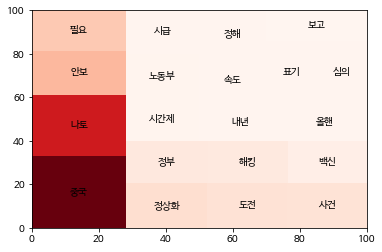

In [85]:
import squarify
import seaborn as sns
import matplotlib

df = pd.read_csv(DATA_DIR+'보수_뉴스_키워드.csv')
df['coef'] = df['coef']*-1

df_pivot = df.pivot_table(index='keyword', values = 'coef', aggfunc = 'sum') # 피벗테이블 만들기
df_pivot = df_pivot.sort_values(by='coef', ascending = False)  # 값 정렬하기



df_pivot = df.pivot_table(index='keyword', values = 'coef', aggfunc = 'sum') # 피벗테이블 만들기
df_pivot = df_pivot.sort_values(by='coef', ascending = False)  # 값 정렬하기

cmap = matplotlib.cm.Reds    # 값이 클 수록 진한 빨간색을 가지는 컬러맵
minimum=df_pivot['coef'].min()
maximum=df_pivot['coef'].max()
norm = matplotlib.colors.Normalize(vmin=minimum, vmax=maximum)   # 최소값, 최대값으로 정규화 하기
color_list = [cmap(norm(value)) for value in df_pivot['coef']]       # 컬러 표현값으로 변경하기
color_list

squarify.plot(sizes=df_pivot['coef'], label = df_pivot.index, color=color_list)
